In [28]:
from importlib import reload

import GPRutils
import vK2KGPR
import plotGPR

import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

In [2]:
exp = 370609
dC = GPRutils.loadNPZ(f"../thesis/{exp}/{exp}.npz")

In [3]:
X = np.concatenate((dC.Xvalid, dC.Xtrain), axis=0)
Y = np.concatenate((dC.Yvalid, dC.Ytrain), axis=0)
E = np.concatenate((dC.Evalid_DES, dC.Etrain_DES), axis=0)

In [4]:
GP = vK2KGPR.vonKarman2KernelGPR(dC)

In [5]:
GP.fit(dC.params)

/home/fortino/DESworkspace/vonkarmanFT.py:65: RuntimeWarning: divide by zero encountered in true_divide
  airy = (j1(kR)/(kR))**2
/home/fortino/DESworkspace/vonkarmanFT.py:65: RuntimeWarning: invalid value encountered in true_divide
  airy = (j1(kR)/(kR))**2
/home/fortino/DESworkspace/vonkarmanFT.py:75: RuntimeWarning: divide by zero encountered in true_divide
  w = np.where(kWind==0, 1., np.sin(kWind) / kWind)
/home/fortino/DESworkspace/vonkarmanFT.py:75: RuntimeWarning: invalid value encountered in true_divide
  w = np.where(kWind==0, 1., np.sin(kWind) / kWind)


In [6]:
GP.predict(X)

In [7]:
x, y = X.T*u.deg
dx, dy = Y.T*u.mas
err = np.sqrt(E)*u.mas

x2, y2 = x, y
dx2, dy2 = Y.T*u.mas - dC.fbar_s.T*u.mas
err2 = err

/home/fortino/DESworkspace/GPRutils.py:745: RuntimeWarning: invalid value encountered in true_divide
  sumWeights_x / sumWeights,
/home/fortino/DESworkspace/GPRutils.py:749: RuntimeWarning: invalid value encountered in true_divide
  sumWeights_y / sumWeights,
/home/fortino/DESworkspace/GPRutils.py:753: RuntimeWarning: divide by zero encountered in reciprocal
  sumWeights**-1.,
/home/fortino/DESworkspace/GPRutils.py:764: RuntimeWarning: invalid value encountered in less
  sumWeights < (maxErr**2.).value)
/home/fortino/DESworkspace/GPRutils.py:771: RuntimeWarning: invalid value encountered in greater
  RMS_x = np.std(sumWeights_x[sumWeights > 0.])*u.mas
/home/fortino/DESworkspace/GPRutils.py:772: RuntimeWarning: invalid value encountered in greater
  RMS_y = np.std(sumWeights_y[sumWeights > 0.])*u.mas
/home/fortino/DESworkspace/GPRutils.py:773: RuntimeWarning: invalid value encountered in greater
  noise = np.sqrt(np.mean(sumWeights[sumWeights > 0.]))*u.mas


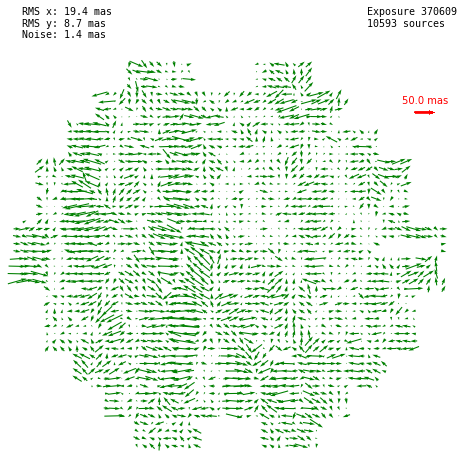

In [48]:
reload(plotGPR)
plotGPR.AstrometricResiduals(
    x, y, dx, dy, err,
#     x2=x2, y2=y2, dx2=dx2, dy2=dy2, err2=err2,
    exposure=dC.expNum,
    scale=500*u.mas,
    pixelsPerBin=512,
    savePath="."
)

/home/fortino/DESworkspace/GPRutils.py:745: RuntimeWarning: invalid value encountered in true_divide
  sumWeights_x / sumWeights,
/home/fortino/DESworkspace/GPRutils.py:749: RuntimeWarning: invalid value encountered in true_divide
  sumWeights_y / sumWeights,
/home/fortino/DESworkspace/GPRutils.py:753: RuntimeWarning: divide by zero encountered in reciprocal
  sumWeights**-1.,
/home/fortino/DESworkspace/GPRutils.py:764: RuntimeWarning: invalid value encountered in less
  sumWeights < (maxErr**2.).value)
/home/fortino/DESworkspace/GPRutils.py:771: RuntimeWarning: invalid value encountered in greater
  RMS_x = np.std(sumWeights_x[sumWeights > 0.])*u.mas
/home/fortino/DESworkspace/GPRutils.py:772: RuntimeWarning: invalid value encountered in greater
  RMS_y = np.std(sumWeights_y[sumWeights > 0.])*u.mas
/home/fortino/DESworkspace/GPRutils.py:773: RuntimeWarning: invalid value encountered in greater
  noise = np.sqrt(np.mean(sumWeights[sumWeights > 0.]))*u.mas


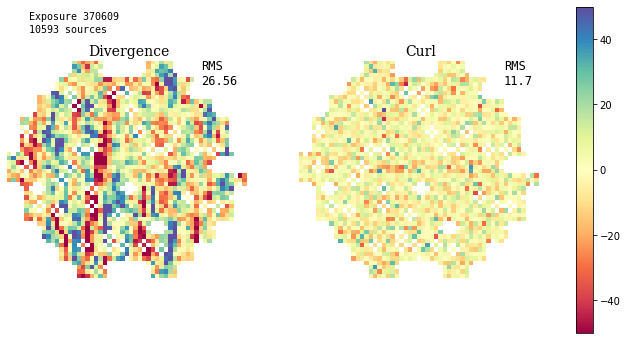

In [49]:
reload(plotGPR)
plotGPR.DivCurl(
    x, y, dx, dy, err,
#     x2=x2, y2=y2, dx2=dx2, dy2=dy2, err2=err2,
    exposure=dC.expNum,
    pixelsPerBin=512,
    scale=50,
    savePath="."
)

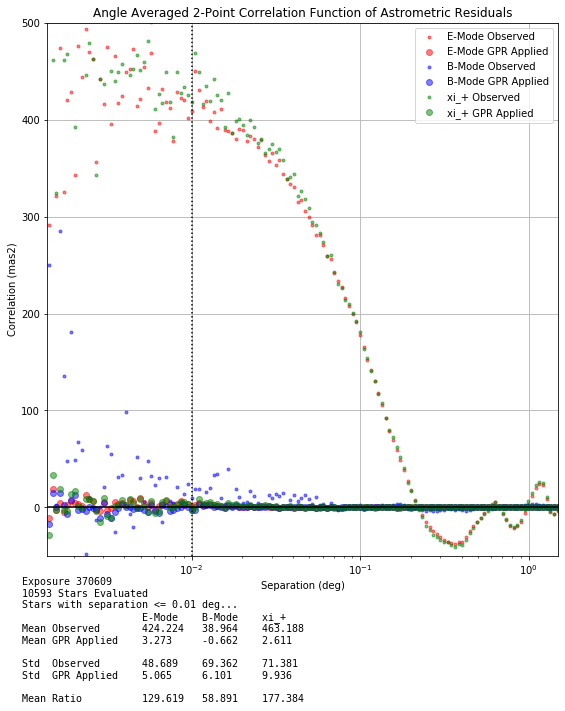

In [41]:
plotGPR.Correlation(
    x, y, dx, dy,
    x2=x2, y2=y2, dx2=dx2, dy2=dy2,
    exposure=dC.expNum,
    ylim=(-50, 500),
    xiB_ON=True,
    xiE_ON=True,
    xiplus_ON=True,
#     avgLine=False,
#     showInfo=False
    
)

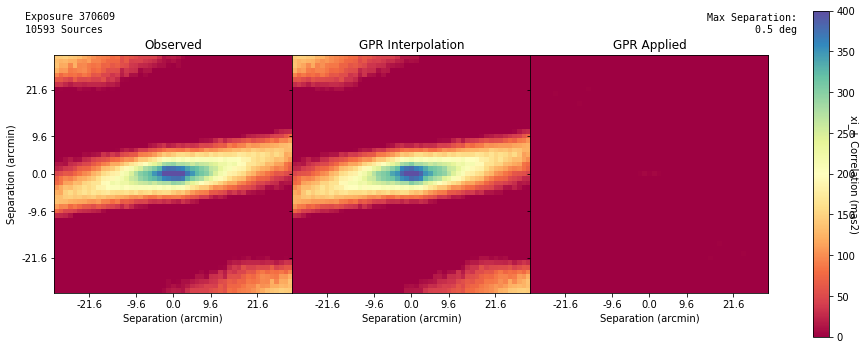

In [51]:
plotGPR.Correlation2D(
    x, y, dx, dy,
    x2=x2, y2=y2, dx2=dx2, dy2=dy2,
    exposure=dC.expNum,
    nBins=50,
    vmin=0*u.mas**2,
    vmax=400*u.mas**2,
    rmax=0.5*u.deg,
#     title1="",
#     savePath=""
)